In [1]:
# Import libraries
import os
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Read all .txt files in the folder and put them into a dataframe
folder_path = r"C:\Users\CYBORG\Desktop\ML_Assignment\articles"

texts = []
filenames = []

for file in os.listdir(folder_path):
    if file.endswith(".txt"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, "r", encoding="utf-8", errors='ignore') as f:
            texts.append(f.read())
            filenames.append(file)

# Creating a DataFrame (table) with filenames and content
data = pd.DataFrame({"filename": filenames, "content": texts})
data.head()  # This will show the first 5 articles


,filename,content
0,0.txt,SoftBank's $100 Billion Tech Fund Rankles VCs ...
1,1.txt,Quora tests video answers to steal Q&A from Yo...
2,10.txt,Cisco revenue forecast disappoints; says to cu...
3,100.txt,Elon Musk s SpaceX makes history by launching ...
4,1000.txt,Theranos Lab Poses Immediate Jeopardy to Pati...


In [3]:
# Convert articles into numbers
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(data['content'])


In [4]:
# Perform clustering
n_clusters = 5  
model = AgglomerativeClustering(n_clusters=n_clusters)
labels = model.fit_predict(X.toarray())

# Add cluster labels to data
data['cluster'] = labels
data.head(100)  # Display first 10 articles with their cluster labels


,filename,content,cluster
0,0.txt,SoftBank's $100 Billion Tech Fund Rankles VCs ...,0
1,1.txt,Quora tests video answers to steal Q&A from Yo...,1
2,10.txt,Cisco revenue forecast disappoints; says to cu...,0
3,100.txt,Elon Musk s SpaceX makes history by launching ...,0
4,1000.txt,Theranos Lab Poses Immediate Jeopardy to Pati...,0
...,...,...,...
95,1083.txt,Foodpanda India to sack about 330 employees: F...,0
96,1084.txt,Universities Race to Nurture Start-Up Founders...,0
97,1085.txt,"LinkedIn Rival Viadeo Exits China: Viadeo, the...",0
98,1086.txt,Facebook Pitches Free Basics to India as Net N...,1


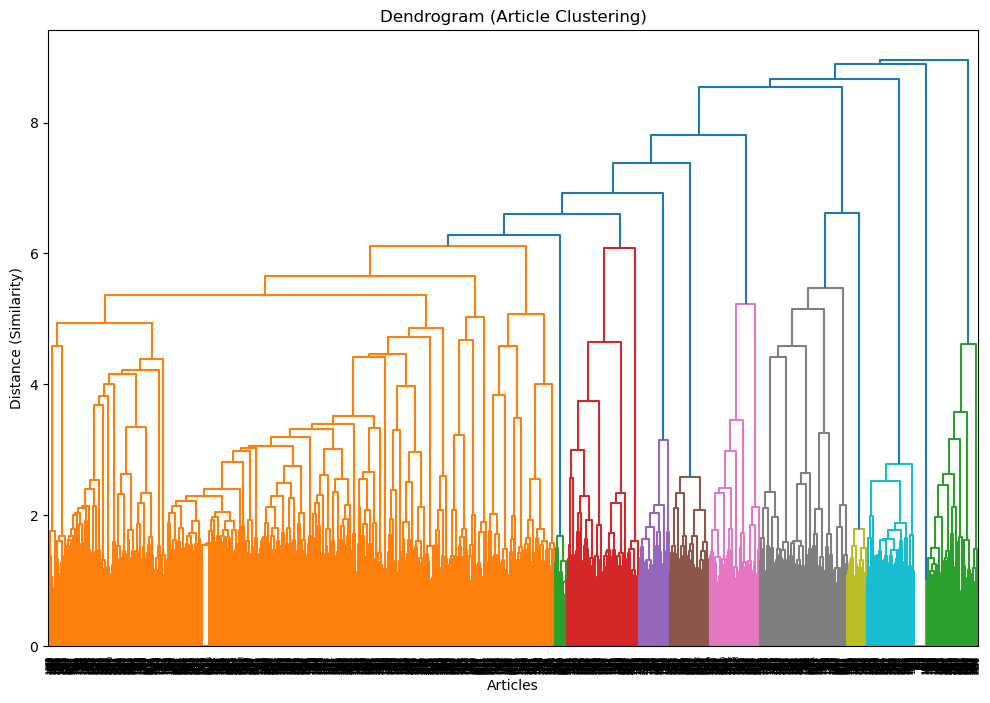

In [5]:
# Dendrogram Visualization
linked = linkage(X.toarray(), method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram (Article Clustering)')
plt.xlabel('Articles')
plt.ylabel('Distance (Similarity)')
plt.show()

In [6]:
# Check articles by cluster (simple visualization)
for i in range(n_clusters):
    print(f"\n--- Articles in Cluster {i} ---\n")
    print(data[data['cluster'] == i]['filename'].head())



--- Articles in Cluster 0 ---

0       0.txt
2      10.txt
3     100.txt
4    1000.txt
5    1001.txt
Name: filename, dtype: object

--- Articles in Cluster 1 ---

1        1.txt
16    1011.txt
20    1015.txt
27    1021.txt
40    1033.txt
Name: filename, dtype: object

--- Articles in Cluster 2 ---

748    1671.txt
753    1676.txt
761    1683.txt
766    1688.txt
773    1694.txt
Name: filename, dtype: object

--- Articles in Cluster 3 ---

21    1016.txt
36     103.txt
39    1032.txt
64    1055.txt
86    1075.txt
Name: filename, dtype: object

--- Articles in Cluster 4 ---

13    1009.txt
44    1037.txt
50    1042.txt
73    1063.txt
81    1070.txt
Name: filename, dtype: object


In [7]:
# Saving your clustering results to a CSV file
data.to_csv("clustered_articles.csv", index=False)


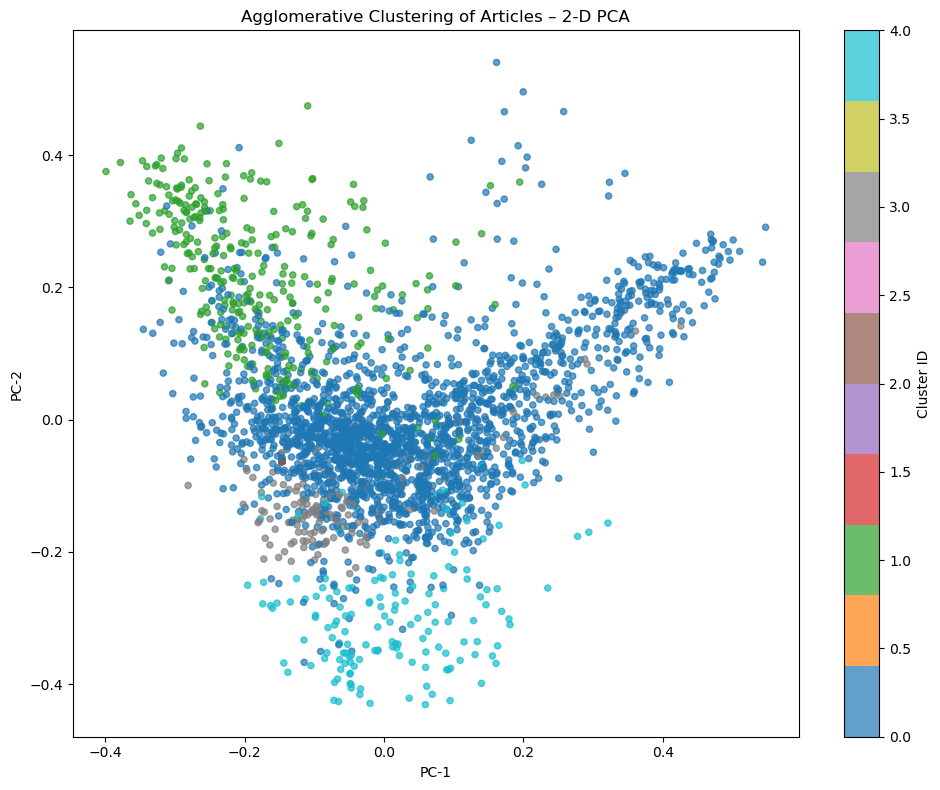

In [8]:
# --- 2-D PCA plot for ALL articles (Figure 5) --------------------------
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X  = your TF-IDF matrix from preprocessing
# labels = cluster labels from the Agglomerative model

coords = PCA(n_components=2, random_state=42).fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(coords[:, 0], coords[:, 1],
                      c=labels, cmap='tab10', s=20, alpha=0.7)
plt.title("Agglomerative Clustering of Articles – 2-D PCA")
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.colorbar(label="Cluster ID")
plt.tight_layout()
plt.show()
# ----------------------------------------------------------------------
